<a href="https://colab.research.google.com/github/Motupallysundaracharya38/AIandML_INTERNSHIP/blob/master/OBJECTdetect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
with open('/gdrive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat '/gdrive/My Drive/foo.txt'

Hello Google Drive!

In [3]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [4]:
# Some models to train on
MODELS_CONFIG = {
    'ssd_mobilenet_v2': {
        'model_name': 'ssd_mobilenet_v2_coco_2018_03_29', # Layers input and output shape how many neurons in each layer(Model building)
        'pipeline_file': 'ssd_mobilenet_v2_coco.config', # While compiling and fitting the model some parameters should be tuned (Defining the arguments values)
    },
    'faster_rcnn_inception_v2': {
        'model_name': 'faster_rcnn_inception_v2_coco_2018_01_28',
        'pipeline_file': 'faster_rcnn_inception_v2_pets.config',
    },
    'rfcn_resnet101': {
        'model_name': 'rfcn_resnet101_coco_2018_01_28',
        'pipeline_file': 'rfcn_resnet101_pets.config',
    }
}

# Select a model in `MODELS_CONFIG`.
# I chose ssd_mobilenet_v2 for this project, you could choose any
selected_model = 'ssd_mobilenet_v2'

In [5]:
!apt-get install -qq protobuf-compiler python-pil python-lxml python-tk

!pip install -qq Cython contextlib2 pillow lxml matplotlib

!pip install -qq pycocotools

Selecting previously unselected package python-bs4.
(Reading database ... 144465 files and directories currently installed.)
Preparing to unpack .../0-python-bs4_4.6.0-1_all.deb ...
Unpacking python-bs4 (4.6.0-1) ...
Selecting previously unselected package python-pkg-resources.
Preparing to unpack .../1-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-chardet.
Preparing to unpack .../2-python-chardet_3.0.4-1_all.deb ...
Unpacking python-chardet (3.0.4-1) ...
Selecting previously unselected package python-six.
Preparing to unpack .../3-python-six_1.11.0-2_all.deb ...
Unpacking python-six (1.11.0-2) ...
Selecting previously unselected package python-webencodings.
Preparing to unpack .../4-python-webencodings_0.5-2_all.deb ...
Unpacking python-webencodings (0.5-2) ...
Selecting previously unselected package python-html5lib.
Preparing to unpack .../5-python-html5lib_0.999999999-1_all.deb ...
Unpacking pyt

In [6]:
from __future__ import division, print_function, absolute_import

import pandas as pd
import numpy as np
import csv
import re
import cv2 
import os
import glob
import xml.etree.ElementTree as ET

import io
import tensorflow.compat.v1 as tf

from PIL import Image
from collections import namedtuple, OrderedDict

import shutil
import urllib.request
import tarfile

from google.colab import files

In [7]:
print(tf.__version__)

1.15.2


In [8]:
#creates a directory for the whole project
!mkdir aeroplane_detection

In [9]:
!ls

aeroplane_detection  drive  sample_data


In [10]:
cd aeroplane_detection

/content/aeroplane_detection


In [11]:
# creating a directory to store the training and testing data
!mkdir data

# folders for the training and testing data.
!mkdir data/images data/train_labels data/test_labels

In [12]:
!ls

data


In [13]:
!pwd

/content/aeroplane_detection


In [14]:
import os
os.listdir('data')

['test_labels', 'train_labels', 'images']

In [15]:
import os
import zipfile
local_zip = "/content/drive/My Drive/Images.zip" ## which zip file you want to extarct
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp') ## In which location you want to store extracted files
zip_ref.close()

In [16]:
import os
import zipfile
local_zip = "/content/drive/My Drive/Airplanes_Annotations.zip" ## which zip file you want to extarct
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp') ## In which location you want to store extracted files
zip_ref.close()

In [17]:
os.listdir("/tmp/Images")

['airplane_296.jpg',
 'airplane_227.jpg',
 'airplane_279.jpg',
 'airplane_176.jpg',
 'airplane_659.jpg',
 'airplane_481.jpg',
 'airplane_619.jpg',
 '42848.jpg',
 'airplane_194.jpg',
 'airplane_361.jpg',
 'airplane_496.jpg',
 'airplane_435.jpg',
 'airplane_381.jpg',
 'hotanairport5.jpg',
 'airplane_165.jpg',
 '42850.jpg',
 '428462.jpg',
 'airplane_640.jpg',
 '428491.jpg',
 'airplane_650.jpg',
 'airplane_653.jpg',
 'airplane_006.jpg',
 'airplane_691.jpg',
 'airplane_431.jpg',
 'airplane_599.jpg',
 '42847.jpg',
 'airplane_535.jpg',
 'airplane_324.jpg',
 'airplane_125.jpg',
 'airplane_090.jpg',
 'airplane_371.jpg',
 'airplane_281.jpg',
 'airplane_645.jpg',
 'airplane_068.jpg',
 'airplane_444.jpg',
 'airplane_198.jpg',
 'airplane_153.jpg',
 'airplane_355.jpg',
 'airplane_266.jpg',
 'airplane_547.jpg',
 'airplane_578.jpg',
 'airplane_517.jpg',
 'airplane_531.jpg',
 'airplane_337.jpg',
 'airplane_239.jpg',
 'airplane_468.jpg',
 'airplane_221.jpg',
 'airplane_548.jpg',
 'airplane_216.jpg',
 'a

In [18]:
os.listdir("/tmp/Airplanes_Annotations")

['airplane_337.csv',
 'airplane_628.csv',
 'airplane_080.csv',
 'airplane_363.csv',
 'airplane_414.csv',
 'airplane_582.csv',
 'airplane_696.csv',
 'airplane_559.csv',
 'airplane_488.csv',
 'airplane_336.csv',
 'airplane_533.csv',
 'airplane_249.csv',
 'airplane_645.csv',
 'airplane_493.csv',
 'airplane_260.csv',
 'airplane_208.csv',
 'airplane_436.csv',
 'airplane_097.csv',
 'airplane_418.csv',
 'airplane_644.csv',
 'airplane_278.csv',
 'airplane_257.csv',
 'airplane_573.csv',
 'airplane_373.csv',
 'airplane_658.csv',
 'airplane_214.csv',
 'airplane_699.csv',
 'airplane_213.csv',
 'airplane_229.csv',
 'airplane_687.csv',
 'airplane_676.csv',
 'airplane_020.csv',
 'airplane_595.csv',
 'airplane_109.csv',
 'airplane_005.csv',
 'Planes3.csv',
 'airplane_591.csv',
 'airplane_479.csv',
 'airplane_556.csv',
 'airplane_172.csv',
 'airplane_425.csv',
 'airplane_546.csv',
 'airplane_274.csv',
 'airplane_597.csv',
 'airplane_095.csv',
 'airplane_238.csv',
 'airplane_641.csv',
 'airplane_173.csv

In [19]:
!mv /tmp/Images/* data/images

In [20]:
!mv /tmp/Airplanes_Annotations/* data/train_labels

In [23]:
# lists the files inside 'annotations' in a random order (not really random, by their hash value instead)
# Moves the first 100 labels to the testing dir: `test_labels`
!ls data/train_labels/* | sort -R | head -200 | xargs -I{} mv {} data/test_labels

In [24]:
!ls data/train_labels/ | wc -l

529


In [25]:
!ls  data/test_labels/ | wc -l

200


In [26]:
%cd /content/aeroplane_detection/data

/content/aeroplane_detection/data


In [27]:
cd train_labels

/content/aeroplane_detection/data/train_labels


In [167]:
import glob
glob.glob('*.csv')

[]

In [28]:
train=[]
import os
for f in os.listdir():
  file1=open(f,'r')
  for line in file1.readlines():
    line=line.strip('\n')
    l=[str(f.split('.')[0])+".jpg"]
    l=l+line.split(' ')
    train.append(l)
print(len(train))

2277


In [29]:
%cd /content/aeroplane_detection/data

/content/aeroplane_detection/data


In [30]:
cd test_labels

/content/aeroplane_detection/data/test_labels


In [31]:
!pwd

/content/aeroplane_detection/data/test_labels


In [32]:
test=[]
import os
for f in os.listdir():
  file1=open(f,'r')
  for line in file1.readlines():
    line=line.strip('\n')
    l=[str(f.split('.')[0])+".jpg"]
    
    l=l+line.split(' ')
    test.append(l)
print(len(test))

630


In [33]:
train=pd.DataFrame(train,columns=['filename','xmin','ymin','xmax','ymax'])

In [34]:
test=pd.DataFrame(test,columns=['filename','xmin','ymin','xmax','ymax'])

In [35]:
test.head()

,filename,xmin,ymin,xmax,ymax
0,airplane_337.jpg,4,26,41,63
1,airplane_337.jpg,13,65,60,97
2,airplane_337.jpg,24,108,62,141
3,airplane_337.jpg,29,207,65,239
4,airplane_080.jpg,68,132,174,244


In [36]:
train.head()

,filename,xmin,ymin,xmax,ymax
0,airplane_628.jpg,98,8,127,31
1,airplane_628.jpg,74,45,114,79
2,airplane_628.jpg,35,128,77,163
3,airplane_628.jpg,8,177,50,210
4,airplane_363.jpg,44,98,115,179


In [37]:
!pwd

/content/aeroplane_detection/data/test_labels


In [38]:
!pwd

/content/aeroplane_detection/data/test_labels


In [39]:
cd -

/content/aeroplane_detection/data


In [40]:
%cd /content/aeroplane_detection/data
label_map_path = os.path.join("label_map.pbtxt")
classes=['aeroplane']
pbtxt_content = ""
print(type(classes))
#creats a pbtxt file the has the class names.
for i, class_name in enumerate(classes):
    # display_name is optional.
    pbtxt_content = (
        pbtxt_content
        + "item {{\n    id: {0}\n    name: '{1}'\n    display_name: 'aeroplane'\n }}\n\n".format(i + 1, class_name)
    )
pbtxt_content = pbtxt_content.strip()
with open(label_map_path, "w") as f:
    f.write(pbtxt_content)

/content/aeroplane_detection/data
<class 'list'>


In [41]:
#checking the pbtxt file
!cat label_map.pbtxt

item {
    id: 1
    name: 'aeroplane'
    display_name: 'aeroplane'
 }

In [42]:
!ls -l

total 80
drwxr-xr-x 2 root root 32768 Jul 20 09:14 images
-rw-r--r-- 1 root root    71 Jul 20 09:14 label_map.pbtxt
drwxr-xr-x 2 root root 12288 Jul 20 09:14 test_labels
drwxr-xr-x 2 root root 32768 Jul 20 09:14 train_labels


In [43]:
!pwd


/content/aeroplane_detection/data


In [44]:

# https://colab.research.google.com/drive/166QSWpRQVr7Da1afFeBlmyhDHkoDi5BR?authuser=2


In [45]:
%cd /content/aeroplane_detection/data
train.to_csv('train_labels.csv', encoding='utf-8', index=False)
test.to_csv('test_labels.csv', encoding='utf-8', index=False)

/content/aeroplane_detection/data


In [46]:
!ls -l

total 168
drwxr-xr-x 2 root root 32768 Jul 20 09:14 images
-rw-r--r-- 1 root root    71 Jul 20 09:14 label_map.pbtxt
drwxr-xr-x 2 root root 12288 Jul 20 09:14 test_labels
-rw-r--r-- 1 root root 19466 Jul 20 09:15 test_labels.csv
drwxr-xr-x 2 root root 32768 Jul 20 09:14 train_labels
-rw-r--r-- 1 root root 68751 Jul 20 09:15 train_labels.csv


/content/aeroplane_detection/data
airplane_628.jpg 45 114 79


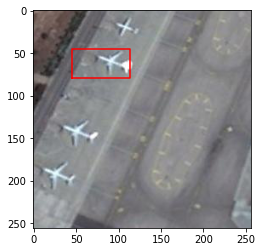

In [68]:
%cd /content/aeroplane_detection/data
from PIL import Image

os.listdir('images')
#image = Image.open("images/4f30dc4b8e2a583d.jpg")
#height,width=image.size
#print(height,width)
import matplotlib.pyplot as plt
import matplotlib.patches as patches
for row in train.values[1:]:
  img = plt.imread("images/"+row[0])
  plt.imshow(img)
  print(row[0],row[2],row[3],row[4])
  plt.plot([float(row[2]),float(row[3]),float(row[3]),float(row[2]),float(row[2])],[float(row[4]),float(row[4]),float(row[2]),float(row[2]),float(row[4])],color='r')
  break

In [66]:
# Downlaods Tenorflow
%cd /content/aeroplane_detection/
!git clone --q https://github.com/tensorflow/models.git

/content/aeroplane_detection


In [69]:
!mv models/official models/research/official

In [70]:
%cd /content/aeroplane_detection/models/research
#compiling the proto buffers (not important to understand for this project but you can learn more about them here: https://developers.google.com/protocol-buffers/)
!protoc object_detection/protos/*.proto --python_out=.

# exports the PYTHONPATH environment variable with the reasearch and slim folders' paths
os.environ['PYTHONPATH'] += ':/content/aeroplane_detection/models/research/:/content/aeroplane_detection/models/research/slim/'

/content/aeroplane_detection/models/research
object_detection/protos/input_reader.proto: warning: Import object_detection/protos/image_resizer.proto but not used.


In [71]:
# testing the model builder
!pip install tf_slim

!python3 object_detection/builders/model_builder_test.py

     |████████████████████████████████| 358kB 6.9MB/s 


In [73]:
#adjusted from: https://github.com/datitran/raccoon_dataset

# converts the csv files for training and testing data to two TFRecords files.
# places the output in the same directory as the input


from object_detection.utils import dataset_util
%cd /content/aeroplane_detection/models/

DATA_BASE_PATH = '/content/aeroplane_detection/data/'
image_dir = DATA_BASE_PATH +'images/'

def class_text_to_int(row_label):
		if row_label == 'Handgun':
				return 1
		else:
				None


def split(df, group):
		data = namedtuple('data', ['filename', 'object'])
		gb = df.groupby(group)
		return [data(filename, gb.get_group(x)) for filename, x in zip(gb.groups.keys(), gb.groups)]

def create_tf_example(group, path):
		with tf.io.gfile.GFile(os.path.join(path, '{}'.format(group.filename)), 'rb') as fid:
				encoded_jpg = fid.read()
		encoded_jpg_io = io.BytesIO(encoded_jpg)
		image = Image.open(encoded_jpg_io)
		width, height = image.size

		filename = group.filename.encode('utf8')
		image_format = b'jpg'
		xmins = []
		xmaxs = []
		ymins = []
		ymaxs = []
		classes_text = []
		classes = []

		for index, row in group.object.iterrows():
				xmins.append(float(row['xmin']) / width)
				xmaxs.append(float(row['xmax']) / width)
				ymins.append(float(row['ymin']) / height)
				ymaxs.append(float(row['ymax']) / height)
			

		tf_example = tf.train.Example(features=tf.train.Features(feature={
				'image/height': dataset_util.int64_feature(height),
				'image/width': dataset_util.int64_feature(width),
				'image/filename': dataset_util.bytes_feature(filename),
				'image/source_id': dataset_util.bytes_feature(filename),
				'image/encoded': dataset_util.bytes_feature(encoded_jpg),
				'image/format': dataset_util.bytes_feature(image_format),
				'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
				'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
				'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
				'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
		}))
		return tf_example

for csv in ['train_labels', 'test_labels']:
  writer = tf.io.TFRecordWriter(DATA_BASE_PATH + csv + '.record')
  path = os.path.join(image_dir)
  examples = pd.read_csv(DATA_BASE_PATH + csv + '.csv')
  grouped = split(examples, 'filename')
  for group in grouped:
      tf_example = create_tf_example(group, path)
      writer.write(tf_example.SerializeToString())
    
  writer.close()
  output_path = os.path.join(os.getcwd(), DATA_BASE_PATH + csv + '.record')
  print('Successfully created the TFRecords: {}'.format(DATA_BASE_PATH +csv + '.record'))


/content/aeroplane_detection/models
Successfully created the TFRecords: /content/aeroplane_detection/data/train_labels.record
Successfully created the TFRecords: /content/aeroplane_detection/data/test_labels.record


In [74]:
examples

,filename,xmin,ymin,xmax,ymax
0,airplane_337.jpg,4,26.0,41.0,63.0
1,airplane_337.jpg,13,65.0,60.0,97.0
2,airplane_337.jpg,24,108.0,62.0,141.0
3,airplane_337.jpg,29,207.0,65.0,239.0
4,airplane_080.jpg,68,132.0,174.0,244.0
...,...,...,...,...,...
625,airplane_047.jpg,47,72.0,179.0,173.0
626,airplane_316.jpg,79,31.0,119.0,67.0
627,airplane_316.jpg,226,99.0,253.0,125.0
628,airplane_316.jpg,107,164.0,145.0,202.0


In [75]:
# TFRecords are created
!ls -lX /content/aeroplane_detection/data/

total 9216
drwxr-xr-x 2 root root   32768 Jul 20 09:14 images
drwxr-xr-x 7 root root    4096 Jul 20 09:22 models
drwxr-xr-x 2 root root   12288 Jul 20 09:14 test_labels
drwxr-xr-x 2 root root   32768 Jul 20 09:14 train_labels
-rw-r--r-- 1 root root   19466 Jul 20 09:15 test_labels.csv
-rw-r--r-- 1 root root   68751 Jul 20 09:15 train_labels.csv
-rw-r--r-- 1 root root      71 Jul 20 09:14 label_map.pbtxt
-rw-r--r-- 1 root root 2466674 Jul 20 09:26 test_labels.record
-rw-r--r-- 1 root root 6789455 Jul 20 09:26 train_labels.record


In [77]:
%cd /content/aeroplane_detection/models/research

# Name of the object detection model to use.
MODEL = MODELS_CONFIG[selected_model]['model_name']

# Name of the pipline file in tensorflow object detection API.
pipeline_file = MODELS_CONFIG[selected_model]['pipeline_file']

#selecting the model
MODEL_FILE = MODEL + '.tar.gz'

#creating the downlaod link for the model selected
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

#the distination folder where the model will be saved
fine_tune_dir = '/content/aeroplane_detection/models/research/pretrained_model'

#checks if the model has already been downloaded
if not (os.path.exists(MODEL_FILE)):
    urllib.request.urlretrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)

#unzipping the file and extracting its content
tar = tarfile.open(MODEL_FILE)
tar.extractall()
tar.close()

# creating an output file to save the model while training
os.remove(MODEL_FILE)
if (os.path.exists(fine_tune_dir)):
    shutil.rmtree(fine_tune_dir)
os.rename(MODEL, fine_tune_dir)


/content/aeroplane_detection/models/research


In [78]:
#checking the content of the pretrained model.
# this is the directory of the "fine_tune_checkpoint" that is used in the config file.
!echo {fine_tune_dir}
!ls -alh {fine_tune_dir}

/content/aeroplane_detection/models/research/pretrained_model
total 135M
drwxr-xr-x  3 345018 89939 4.0K Mar 30  2018 .
drwxr-xr-x 63 root   root  4.0K Jul 20 09:29 ..
-rw-r--r--  1 345018 89939   77 Mar 30  2018 checkpoint
-rw-r--r--  1 345018 89939  67M Mar 30  2018 frozen_inference_graph.pb
-rw-r--r--  1 345018 89939  65M Mar 30  2018 model.ckpt.data-00000-of-00001
-rw-r--r--  1 345018 89939  15K Mar 30  2018 model.ckpt.index
-rw-r--r--  1 345018 89939 3.4M Mar 30  2018 model.ckpt.meta
-rw-r--r--  1 345018 89939 4.2K Mar 30  2018 pipeline.config
drwxr-xr-x  3 345018 89939 4.0K Mar 30  2018 saved_model


In [79]:
#the path to the folder containing all the sample config files
CONFIG_BASE = "/content/aeroplane_detection/models/research/object_detection/samples/configs/"

#path to the specified model's config file
model_pipline = os.path.join(CONFIG_BASE, pipeline_file)
model_pipline

'/content/aeroplane_detection/models/research/object_detection/samples/configs/ssd_mobilenet_v2_coco.config'

In [80]:
!cat /content/aeroplane_detection/models/research/object_detection/samples/configs/ssd_mobilenet_v2_coco.config

# SSD with Mobilenet v2 configuration for MSCOCO Dataset.
# Users should configure the fine_tune_checkpoint field in the train config as
# well as the label_map_path and input_path fields in the train_input_reader and
# eval_input_reader. Search for "PATH_TO_BE_CONFIGURED" to find the fields that
# should be configured.

model {
  ssd {
    num_classes: 90
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
      argmax_matcher {
        matched_threshold: 0.5
        unmatched_threshold: 0.5
        ignore_thresholds: false
        negatives_lower_than_unmatched: true
        force_match_for_each_row: true
      }
    }
    similarity_calculator {
      iou_similarity {
      }
    }
    anchor_generator {
      ssd_anchor_generator {
        num_layers: 6
        min_scale: 0.2
        max_scale: 0.95
        aspect_ratios: 1.0
        aspect_ratios: 2.0
        aspect

In [81]:
model_pipline

'/content/aeroplane_detection/models/research/object_detection/samples/configs/ssd_mobilenet_v2_coco.config'

In [82]:
#editing the configuration file to add the path for the TFRecords files, pbtxt,batch_size,num_steps,num_classes.
# any image augmentation, hyperparemeter tunning (drop out, batch normalization... etc) would be editted here

%%writefile {model_pipline}
model {
  ssd {
    num_classes: 1 # number of classes to be detected
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
      argmax_matcher {
        matched_threshold: 0.5
        unmatched_threshold: 0.5
        ignore_thresholds: false
        negatives_lower_than_unmatched: true
        force_match_for_each_row: true
      }
    }
    similarity_calculator {
      iou_similarity {
      }
    }
    anchor_generator {
      ssd_anchor_generator {
        num_layers: 6
        min_scale: 0.2
        max_scale: 0.95
        aspect_ratios: 1.0
        aspect_ratios: 2.0
        aspect_ratios: 0.5
        aspect_ratios: 3.0
        aspect_ratios: 0.3333
      }
    }
    # all images will be resized to the below W x H.
    image_resizer { 
      fixed_shape_resizer {
        height: 300
        width: 300
      }
    }
    box_predictor {
      convolutional_box_predictor {
        min_depth: 0
        max_depth: 0
        num_layers_before_predictor: 0
        #use_dropout: false
        use_dropout: true # to counter over fitting. you can also try tweaking its probability below
        dropout_keep_probability: 0.8
        kernel_size: 1
        box_code_size: 4
        apply_sigmoid_to_scores: false
        conv_hyperparams {
          activation: RELU_6,
          regularizer {
            l2_regularizer {
            # weight: 0.00004
            weight: 0.001 # higher regularizition to counter overfitting
          }
          }
          initializer {
            truncated_normal_initializer {
              stddev: 0.03
              mean: 0.0
            }
          }
          batch_norm {
            train: true,
            scale: true,
            center: true,
            decay: 0.9997,
            epsilon: 0.001,
          }
        }
      }
    }
    feature_extractor {
      type: 'ssd_mobilenet_v2'
      min_depth: 16
      depth_multiplier: 1.0
      conv_hyperparams {
        activation: RELU_6,
        regularizer {
          l2_regularizer {
            # weight: 0.00004
            weight: 0.001 # higher regularizition to counter overfitting
          }
        }
        initializer {
          truncated_normal_initializer {
            stddev: 0.03
            mean: 0.0
          }
        }
        batch_norm {
          train: true,
          scale: true,
          center: true,
          decay: 0.9997,
          epsilon: 0.001,
        }
      }
    }
    loss {
      classification_loss {
        weighted_sigmoid {
        }
      }
      localization_loss {
        weighted_smooth_l1 {
        }
      }
      hard_example_miner {
        num_hard_examples: 3000 
        iou_threshold: 0.95
        loss_type: CLASSIFICATION
        max_negatives_per_positive: 3
        min_negatives_per_image: 3
      }
      classification_weight: 1.0
      localization_weight: 1.0
    }
    normalize_loss_by_num_matches: true
    post_processing {
      batch_non_max_suppression {
        score_threshold: 1e-8
        iou_threshold: 0.6
        
        #adjust this to the max number of objects per class. 
        # ex, in my case, i have one pistol in most of the images.
        # . there are some images with more than one up to 16.
        max_detections_per_class: 16
        # max number of detections among all classes. I have 1 class only so
        max_total_detections: 16
      }
      score_converter: SIGMOID
    }
  }
}

train_config: {
  batch_size: 16 # training batch size
  optimizer {
    rms_prop_optimizer: {
      learning_rate: {
        exponential_decay_learning_rate {
          initial_learning_rate: 0.003
          decay_steps: 800720
          decay_factor: 0.95
        }
      }
      momentum_optimizer_value: 0.9
      decay: 0.9
      epsilon: 1.0
    }
  }

  #the path to the pretrained model. 
  fine_tune_checkpoint: "/content/aeroplane_detection/models/research/pretrained_model/model.ckpt"
  fine_tune_checkpoint_type:  "detection"
  # Note: The below line limits the training process to 200K steps, which we
  # empirically found to be sufficient enough to train the pets dataset. This
  # effectively bypasses the learning rate schedule (the learning rate will
  # never decay). Remove the below line to train indefinitely.
  num_steps: 1000
  

  #data augmentaion is done here, you can remove or add more.
  # They will help the model generalize but the training time will increase greatly by using more data augmentation.
  # Check this link to add more image augmentation: https://github.com/tensorflow/models/blob/master/research/object_detection/protos/preprocessor.proto
  
  data_augmentation_options {
    random_horizontal_flip {
    }
  }
  data_augmentation_options {
    random_adjust_contrast {
    }
  }
  data_augmentation_options {
    ssd_random_crop {
    }
  }
}

train_input_reader: {
  tf_record_input_reader {
    #path to the training TFRecord
    input_path: "/content/aeroplane_detection/data/train_labels.record"
  }
  #path to the label map 
  label_map_path: "/content/aeroplane_detection/data/label_map.pbtxt"
}

eval_config: {
  # the number of images in your "testing" data (was 600 but we removed one above :) )
  num_examples: 599
  # the number of images to disply in Tensorboard while training
  num_visualizations: 20

  # Note: The below line limits the evaluation process to 10 evaluations.
  # Remove the below line to evaluate indefinitely.
  #max_evals: 10
}

eval_input_reader: {
  tf_record_input_reader {
      
    #path to the testing TFRecord
    input_path: "/content/aeroplane_detection/data/test_labels.record"
  }
  #path to the label map 
  label_map_path: "/aeroplane/handgun_detection/data/label_map.pbtxt"
  shuffle: false
  num_readers: 1
}

Overwriting /content/aeroplane_detection/models/research/object_detection/samples/configs/ssd_mobilenet_v2_coco.config


In [83]:
# where the model will be saved at each checkpoint while training 
model_dir = 'training/'

# Optionally: remove content in output model directory to fresh start.
!rm -rf {model_dir}
os.makedirs(model_dir, exist_ok=True)
model_dir

'training/'

In [84]:
#downlaoding ngrok to be able to access tensorboard on google colab
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip -o ngrok-stable-linux-amd64.zip

--2020-07-20 09:34:11--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 34.234.58.229, 100.24.239.43, 18.208.90.15, ...
Connecting to bin.equinox.io (bin.equinox.io)|34.234.58.229|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  12.1MB/s    in 1.1s    

2020-07-20 09:34:13 (12.1 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [85]:
#the logs that are created while training 
LOG_DIR = model_dir
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)
get_ipython().system_raw('./ngrok http 6006 &')

In [86]:
#The link to tensorboard.
#works after the training starts.

### note: if you didnt get a link as output, rerun this cell and the one above
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://a5e7d76eb60c.ngrok.io


In [87]:
model_pipline

'/content/aeroplane_detection/models/research/object_detection/samples/configs/ssd_mobilenet_v2_coco.config'

In [88]:
model_dir

'training/'

In [89]:

!python3 /content/aeroplane_detection/models/research/object_detection/model_main.py \
    --pipeline_config_path={model_pipline}\
    --model_dir={model_dir} \
    --alsologtostderr \

W0720 09:39:05.909368 140432927119232 model_lib.py:758] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting train_steps: None
I0720 09:39:05.909639 140432927119232 config_util.py:552] Maybe overwriting train_steps: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0720 09:39:05.909775 140432927119232 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: 1
I0720 09:39:05.909911 140432927119232 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: 1
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0720 09:39:05.910044 140432927119232 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0720 09:39:05.910282 140432927119232 model_lib.py:774] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
INFO:tensorflow:create_estimator_and_inputs: use_tpu False, export_to_t

In [90]:
model_dir

'training/'

In [91]:
model_pipline

'/content/aeroplane_detection/models/research/object_detection/samples/configs/ssd_mobilenet_v2_coco.config'

In [92]:

#the location where the exported model will be saved in.
output_directory = '/content/aeroplane_detection/models/research/fine_tuned_model'

# goes through the model is the training/ dir and gets the last one.
# you could choose a specfic one instead of the last
lst = os.listdir(model_dir)
lst = [l for l in lst if 'model.ckpt-' in l and '.meta' in l]
steps=np.array([int(re.findall('\d+', l)[0]) for l in lst])
last_model = lst[steps.argmax()].replace('.meta', '')
last_model_path = os.path.join(model_dir, last_model)
print(last_model_path)

#exports the model specifed and inference graph
!python /content/aeroplane_detection/models/research/object_detection/export_inference_graph.py \
    --input_type=image_tensor \
    --pipeline_config_path={model_pipline} \
    --output_directory={output_directory} \
    --trained_checkpoint_prefix={last_model_path}

training/model.ckpt-0
Instructions for updating:
Please use `layer.__call__` method instead.
W0720 09:42:13.139958 140038348003200 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tf_slim/layers/layers.py:1089: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.
INFO:tensorflow:depth of additional conv before box predictor: 0
I0720 09:42:15.776027 140038348003200 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0720 09:42:15.825701 140038348003200 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0720 09:42:15.983379 140038348003200 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth o

In [93]:
steps.argmax()

0

In [94]:
lst = os.listdir(model_dir)
lst

['model.ckpt-0.index',
 'graph.pbtxt',
 'checkpoint',
 'events.out.tfevents.1595237967.eb15f2191177',
 'model.ckpt-0.meta',
 'model.ckpt-0.data-00000-of-00001']

In [95]:
import os

os.path.isdir('./fine_tuned_model')

True

In [96]:
!pwd

/content/aeroplane_detection/models/research


In [97]:
files.download(output_directory + '/frozen_inference_graph.pb')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [98]:
#downlaod the label map
files.download(DATA_BASE_PATH + '/label_map.pbtxt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [99]:
files.download('/content/aeroplane_detection/models/research/fine_tuned_model/model.ckpt.data-00000-of-00001')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [100]:
import tensorflow as tf

def load_graph(frozen_graph_filename):
    # We load the protobuf file from the disk and parse it to retrieve the 
    # unserialized graph_def
    with tf.gfile.GFile(frozen_graph_filename, "rb") as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())

    # Then, we import the graph_def into a new Graph and returns it 
    with tf.Graph().as_default() as graph:
        # The name var will prefix every op/nodes in your graph
        # Since we load everything in a new graph, this is not needed
        tf.import_graph_def(graph_def, name="prefix")
    return graph

In [101]:
gr = load_graph('/content/aeroplane_detection/models/research/fine_tuned_model/frozen_inference_graph.pb')
gr

In [102]:
dir(gr)

['_ControlDependenciesController',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_control_dependencies',
 '_add_device_to_stack',
 '_add_function',
 '_add_new_tf_operations',
 '_add_op',
 '_apply_device_functions',
 '_as_graph_def',
 '_as_graph_element_locked',
 '_attr_scope',
 '_attr_scope_map',
 '_auto_cast_variable_read_dtype',
 '_bcast_grad_args_cache',
 '_building_function',
 '_c_graph',
 '_check_not_finalized',
 '_collections',
 '_colocate_with_for_gradient',
 '_colocation_stack',
 '_container',
 '_control_dependencies_for_inputs',
 '_control_dependencies_stack',
 '_control_flow_context',
 '_copy_functions_to_graph_def',
 '_create_op_from_tf_operation',
 '

In [103]:
for op in gr.get_operations():
        print("Operation Name :",op.name)       # Operation name
        print("Tensor Stats :",str(op.values()) )
        break

Operation Name : prefix/image_tensor
Tensor Stats : (<tf.Tensor 'prefix/image_tensor:0' shape=(?, ?, ?, 3) dtype=uint8>,)


In [106]:
with tf.io.gfile.GFile('/content/aeroplane_detection/data/images/42847.jpg', 'rb') as fid:
				encoded_jpg = fid.read()
encoded_jpg_io = io.BytesIO(encoded_jpg)
image = Image.open(encoded_jpg_io)
type(image)

PIL.JpegImagePlugin.JpegImageFile

In [107]:
ch = gr.get_operation_by_name("prefix/image_tensor")
ch

<tf.Operation 'prefix/image_tensor' type=Placeholder>

In [108]:
help(gr.get_operation_by_name)

Help on method get_operation_by_name in module tensorflow.python.framework.ops:

get_operation_by_name(name) method of tensorflow.python.framework.ops.Graph instance
    Returns the `Operation` with the given `name`.
    
    This method may be called concurrently from multiple threads.
    
    Args:
      name: The name of the `Operation` to return.
    
    Returns:
      The `Operation` with the given `name`.
    
    Raises:
      TypeError: If `name` is not a string.
      KeyError: If `name` does not correspond to an operation in this graph.



In [109]:
l_input = gr.get_tensor_by_name('prefix/image_tensor:0')
l_output = gr.get_tensor_by_name('prefix/raw_detection_scores:0')

In [110]:
l_input

<tf.Tensor 'prefix/image_tensor:0' shape=(?, ?, ?, 3) dtype=uint8>

In [111]:
l_output

<tf.Tensor 'prefix/raw_detection_scores:0' shape=(?, ?, 2) dtype=float32>

In [112]:
l_input = gr.get_operation_by_name('prefix/image_tensor')

l_output = gr.get_operation_by_name('prefix/raw_detection_scores')

In [113]:
l_input

<tf.Operation 'prefix/image_tensor' type=Placeholder>

In [114]:
l_output

<tf.Operation 'prefix/raw_detection_scores' type=Identity>

In [115]:
with tf.Session() as sess:
  sess.run(l_output, feed_dict = {l_input : image} )

RuntimeError: ignored

In [116]:
gr.get_operations()

[<tf.Operation 'prefix/image_tensor' type=Placeholder>,
 <tf.Operation 'prefix/Cast' type=Cast>,
 <tf.Operation 'prefix/Preprocessor/mul/x' type=Const>,
 <tf.Operation 'prefix/Preprocessor/mul' type=Mul>,
 <tf.Operation 'prefix/Preprocessor/sub/y' type=Const>,
 <tf.Operation 'prefix/Preprocessor/sub' type=Sub>,
 <tf.Operation 'prefix/Preprocessor/map/Shape' type=Shape>,
 <tf.Operation 'prefix/Preprocessor/map/strided_slice/stack' type=Const>,
 <tf.Operation 'prefix/Preprocessor/map/strided_slice/stack_1' type=Const>,
 <tf.Operation 'prefix/Preprocessor/map/strided_slice/stack_2' type=Const>,
 <tf.Operation 'prefix/Preprocessor/map/strided_slice' type=StridedSlice>,
 <tf.Operation 'prefix/Preprocessor/map/TensorArray' type=TensorArrayV3>,
 <tf.Operation 'prefix/Preprocessor/map/TensorArrayUnstack/Shape' type=Shape>,
 <tf.Operation 'prefix/Preprocessor/map/TensorArrayUnstack/strided_slice/stack' type=Const>,
 <tf.Operation 'prefix/Preprocessor/map/TensorArrayUnstack/strided_slice/stack_1

In [117]:
with tf.Session() as sess:	    
   with tf.gfile.GFile('/content/aeroplane_detection/models/research/fine_tuned_model/frozen_inference_graph.pb', 'rb') as f:	        
    graph_def = tf.GraphDef()	        
    graph_def.ParseFromString(f.read())	        
    sess.graph.as_default()	        
    g_in = tf.import_graph_def(graph_def)	    
    tensor_output = sess.graph.get_tensor_by_name('import/image_tensor:0')	    
    tensor_input = sess.graph.get_tensor_by_name('import/detection_boxes:0')	    
    predictions = sess.run(tensor_output, {tensor_input:image})	    
    print(predictions)

InvalidArgumentError: ignored

In [118]:

lst = os.listdir(model_dir)
print(lst)

['model.ckpt-0.index', 'graph.pbtxt', 'checkpoint', 'events.out.tfevents.1595237967.eb15f2191177', 'model.ckpt-0.meta', 'model.ckpt-0.data-00000-of-00001']


In [119]:
output_directory

'/content/aeroplane_detection/models/research/fine_tuned_model'

In [120]:
import os
pb_fname = os.path.join(os.path.abspath(output_directory), "frozen_inference_graph.pb")
assert os.path.isfile(pb_fname), '`{}` not exist'.format(pb_fname)

In [121]:
pb_fname

'/content/aeroplane_detection/models/research/fine_tuned_model/frozen_inference_graph.pb'

In [122]:
DATA_BASE_PATH

'/content/aeroplane_detection/data/'

In [123]:
PATH_TO_TEST_IMAGES_DIR =  os.path.join('/content/airplane_detection/', "data/images/")
PATH_TO_TEST_IMAGES_DIR

'/content/airplane_detection/data/images/'

In [124]:
import os
import glob

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = pb_fname

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = DATA_BASE_PATH + '/label_map.pbtxt'

# If you want to test the code with your images, just add images files to the PATH_TO_TEST_IMAGES_DIR.
PATH_TO_TEST_IMAGES_DIR =  os.path.join('/content/aeroplane_detection/', "data/images/")

assert os.path.isfile(pb_fname)
assert os.path.isfile(PATH_TO_LABELS)
TEST_IMAGE_PATHS = glob.glob(os.path.join(PATH_TO_TEST_IMAGES_DIR, "*.*"))
assert len(TEST_IMAGE_PATHS) > 0, 'No image found in `{}`.'.format(PATH_TO_TEST_IMAGES_DIR)
print(TEST_IMAGE_PATHS)

['/content/aeroplane_detection/data/images/airplane_296.jpg', '/content/aeroplane_detection/data/images/airplane_227.jpg', '/content/aeroplane_detection/data/images/airplane_279.jpg', '/content/aeroplane_detection/data/images/airplane_176.jpg', '/content/aeroplane_detection/data/images/airplane_659.jpg', '/content/aeroplane_detection/data/images/airplane_481.jpg', '/content/aeroplane_detection/data/images/airplane_619.jpg', '/content/aeroplane_detection/data/images/42848.jpg', '/content/aeroplane_detection/data/images/airplane_194.jpg', '/content/aeroplane_detection/data/images/airplane_361.jpg', '/content/aeroplane_detection/data/images/airplane_496.jpg', '/content/aeroplane_detection/data/images/airplane_435.jpg', '/content/aeroplane_detection/data/images/airplane_381.jpg', '/content/aeroplane_detection/data/images/hotanairport5.jpg', '/content/aeroplane_detection/data/images/airplane_165.jpg', '/content/aeroplane_detection/data/images/42850.jpg', '/content/aeroplane_detection/data/i

In [125]:
test['filename'].count()

630

In [127]:
%cd /content/aeroplane_detection/data/images

/content/aeroplane_detection/data/images


In [129]:
print(list(test['filename']))

['airplane_337.jpg', 'airplane_337.jpg', 'airplane_337.jpg', 'airplane_337.jpg', 'airplane_080.jpg', 'airplane_488.jpg', 'airplane_488.jpg', 'airplane_488.jpg', 'airplane_488.jpg', 'airplane_336.jpg', 'airplane_645.jpg', 'airplane_645.jpg', 'airplane_645.jpg', 'airplane_097.jpg', 'airplane_097.jpg', 'airplane_097.jpg', 'airplane_418.jpg', 'airplane_418.jpg', 'airplane_418.jpg', 'airplane_418.jpg', 'airplane_418.jpg', 'airplane_418.jpg', 'airplane_573.jpg', 'airplane_373.jpg', 'airplane_373.jpg', 'airplane_373.jpg', 'airplane_373.jpg', 'airplane_214.jpg', 'airplane_214.jpg', 'airplane_214.jpg', 'airplane_214.jpg', 'airplane_214.jpg', 'airplane_214.jpg', 'airplane_214.jpg', 'airplane_229.jpg', 'airplane_229.jpg', 'airplane_229.jpg', 'airplane_676.jpg', 'airplane_274.jpg', 'airplane_274.jpg', 'airplane_274.jpg', 'airplane_274.jpg', 'airplane_274.jpg', 'airplane_274.jpg', 'airplane_597.jpg', 'airplane_597.jpg', 'airplane_597.jpg', 'airplane_095.jpg', 'airplane_238.jpg', 'airplane_641.jpg',

In [130]:
!pwd

/content/aeroplane_detection/data/images


In [132]:
for i in list(test['filename']):
  !cp '/content/aeroplane_detection/data/images/'{i}  '/content/aeroplane_detection/data/images/test_images/'

cp: cannot create regular file '/content/aeroplane_detection/data/images/test_images/': Not a directory
cp: cannot create regular file '/content/aeroplane_detection/data/images/test_images/': Not a directory
cp: cannot create regular file '/content/aeroplane_detection/data/images/test_images/': Not a directory
cp: cannot create regular file '/content/aeroplane_detection/data/images/test_images/': Not a directory
cp: cannot create regular file '/content/aeroplane_detection/data/images/test_images/': Not a directory
cp: cannot create regular file '/content/aeroplane_detection/data/images/test_images/': Not a directory
cp: cannot create regular file '/content/aeroplane_detection/data/images/test_images/': Not a directory
cp: cannot create regular file '/content/aeroplane_detection/data/images/test_images/': Not a directory
cp: cannot create regular file '/content/aeroplane_detection/data/images/test_images/': Not a directory
cp: cannot create regular file '/content/aeroplane_detection/dat

KeyboardInterrupt: ignored

In [133]:
def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: a file path (this can be local or on colossus)

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  plt.show(image)
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)


In [134]:
category_index = {
    1: {'id': 1, 'name': 'aeroplane'} }

In [135]:
import io
import os
import scipy.misc
import numpy as np
import six
import time

from six import BytesIO

import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf
from object_detection.utils import visualization_utils as viz_utils

%matplotlib inline

In [136]:
model_dir

'training/'

In [137]:
!pwd

/content/aeroplane_detection/data/images


In [138]:
model = tf.compat.v2.saved_model.load('/content/aeroplane_detection/models/research/pretrained_model/saved_model', None)



INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [143]:
!ls /content/aeroplane_detection/models/research/pretrained_model/saved_model/variables

In [145]:
!ls /content/aeroplane_detection/models/research/fine_tuned_model/saved_model/variables

In [152]:
!pwd

/content/aeroplane_detection/data/images


In [155]:
!cp /drive/My Drive/*.data-00000-of-00001 /content/aeroplane_detection/models/research/fine_tuned_model/saved_model/variables/
!cp /My Drive/*.index /content/aeroplane_detection/models/research/fine_tuned_model/saved_model/variables/
!cp /My Drive/*.meta /content/aeroplane_detection/models/research/fine_tuned_model/saved_model/variables/

cp: cannot stat '/drive/My': No such file or directory
cp: cannot stat 'Drive/*.data-00000-of-00001': No such file or directory
cp: cannot stat '/My': No such file or directory
cp: cannot stat 'Drive/*.index': No such file or directory
cp: cannot stat '/My': No such file or directory
cp: cannot stat 'Drive/*.meta': No such file or directory


In [156]:
start_time = time.time()
tf.keras.backend.clear_session()
model = tf.compat.v2.saved_model.load('/content/aeroplane_detection/models/research/fine_tuned_model/saved_model/', None)

end_time = time.time()
elapsed_time = end_time - start_time
print('Elapsed time: ' + str(elapsed_time) + 's')

INFO:tensorflow:Saver not created because there are no variables in the graph to restore
Elapsed time: 2.534444570541382s


In [157]:
tf

<module 'tensorflow' from '/tensorflow-1.15.2/python3.6/tensorflow/__init__.py'>

In [158]:
tf.global_variables()

[]

In [160]:
image_path = "/content/aeroplane_detection/models/research/object_detection/test_data/Own_ssd/42847.jpg"
image_np = load_image_into_numpy_array(image_path)
input_tensor = np.expand_dims(image_np, 0)
detections = model(input_tensor)
plt.rcParams['figure.figsize'] = [42, 21]
label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_detections,
        detections['detection_boxes'][0].numpy(),
        detections['detection_classes'][0].numpy().astype(np.int32),
        detections['detection_scores'][0].numpy(),
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=200,
        min_score_thresh=.40,
        agnostic_mode=False)
plt.imshow(image_np_with_detections)

NotFoundError: ignored

In [161]:
!pwd

/content/aeroplane_detection/data/images


In [162]:
cd -


/content/aeroplane_detection/models/research


In [163]:
cd object_detection

/content/aeroplane_detection/models/research/object_detection


In [164]:
print(cv2.__version__)

4.1.2
